<a href="https://colab.research.google.com/github/shivckr/Python-Projects-/blob/master/tsne_with_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download data from kaggle directly into colab

In [4]:
#Mount the drive to colab notebook
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [20]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [0]:
#To access a list of Kaggle datasets.
#!kaggle datasets list

In [0]:
# if you are looking for specific dataset 
#!kaggle datasets list -s MNIST

In [0]:
# copy API and download dataset into your drive
#!kaggle competitions download -c digit-recognizer

In [0]:
# check the file in your directory
#!ls


In [0]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

In [22]:
#Read data
import pandas as pd
df = pd.read_csv('MNIST_train.csv')
labels = df.label
df.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
df.shape

(42000, 785)

# Applying tsne on MNIST data

In [0]:
#credit:
# https://www.kaggle.com/parulpandey/visualizing-kannada-mnist-with-t-sne

In [0]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [38]:
standardized_data = StandardScaler().fit_transform(df)
N = 10000
#slicing syntex  [start : stop : steps]
df_subset = standardized_data[0:N:1] 
labels_N = df.loc[:,'label'].values
labels_N_subset = labels_N[0:N]
print(df_subset.shape)
print(labels_N_subset.shape)
# t-SNE is consumes a lot of memory so we shall use only a subset of our dataset. 


# model = TSNE(n_components=2, random_state = 785)
# tsne_data = model.fit_transform(df_subset) 
# tsne_data = np.vstack((tsne_data.T, labels_N)).T
# tsne_df = pd.DataFrame(data = tsne_data, columns = ("Dim_1","Dim_2", "labels "))
# sns. FacetGrid(tsne_df, hue = "Label", size = 6 ).map(plt.scatter, 'Dim_1','Dim_2','labels' )
# plt.show () 

(10000, 785)
(10000,)


In [40]:
#Applyting t-SNE on the data
%time
tsne = TSNE(random_state = 42, n_components=2, verbose=0, perplexity=40, n_iter=300).fit_transform(df_subset)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.68 µs


In [0]:
Here is a brief explanation of the parameter.

n_components (default: 2): Dimension of the embedded space.
verbose (default: 0) : Verbosity level.
perplexity (default: 30): The perplexity is related to the number of nearest neighbors that are used in other manifold learning algorithms. Consider selecting a value between 5 and 50.
n_iter (default: 1000): Maximum number of iterations for the optimization. Should be at least 250.
There are other parameters which can be tunes. refer to the documentationhttps://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html for detailed info.

In [0]:
#Visualizing the t-SNE


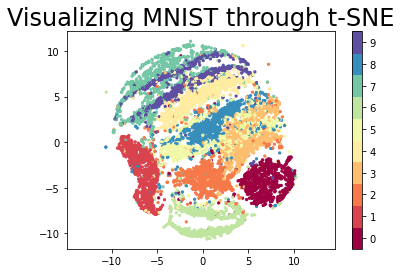

In [49]:
plt.scatter(tsne[:, 0], tsne[:, 1], s= 5, c=labels_N_subset, cmap='Spectral')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('Visualizing MNIST through t-SNE', fontsize=24);